In [1]:
import logging
logging.basicConfig(format='\033[93m%(asctime)s %(levelname)s %(name)s:\033[0m %(message)s', level=logging.INFO, datefmt='%I:%M:%S')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.ZigZag.Builder import ZigZagBuilder
import src.ZigZag.Builder as zzc
from src.ZigZag.Constant import VALUE_COL_NAME,FLAG_COL_NAME,DELTA_NEAR_EXT_COL_NAME,ANGLE_COL_NAME

In [3]:
np.random.seed(1997)

In [4]:
X = np.cumprod(1 + np.random.randn(300) * 0.01)

In [5]:
from datetime import date
from datetime import timedelta 
start_date = date(2000,1,1)
start_date.weekday
x_dt_idx = []
for i in range(300):
    x_dt_idx.append(start_date)
    start_date = start_date+timedelta(days=1)
    while start_date.weekday() >= 5:
        start_date = start_date+timedelta(days=1)

In [6]:
x_sr = pd.Series(X,index=x_dt_idx)
increaser = 1
def increase(x):
    global increaser
    increaser = increaser+0.005
    return x*increaser
x_sr = x_sr.apply(lambda x: increase(x))
x_sr

2000-01-01    1.009469
2000-01-03    1.014741
2000-01-04    1.019599
2000-01-05    1.026967
2000-01-06    1.044660
                ...   
2001-02-16    2.441832
2001-02-19    2.494932
2001-02-20    2.509605
2001-02-21    2.534710
2001-02-22    2.570228
Length: 300, dtype: float64

In [7]:
zzb = ZigZagBuilder(0.01, -0.01)

In [8]:
zzb_df = zzb.build_all(x_sr)
zzb_df.head(20)

,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext,Next_Index,Rows_to_Nearest_Ext
2000-01-01,-1,1.009469,0.012769,1.175465,0.165997,2000-01-19,13.0
2000-01-03,0,1.022238,0.012769,1.175465,0.160725,2000-01-19,12.0
2000-01-04,0,1.035007,0.012769,1.175465,0.155866,2000-01-19,11.0
2000-01-05,0,1.047776,0.012769,1.175465,0.148498,2000-01-19,10.0
2000-01-06,0,1.060545,0.012769,1.175465,0.130805,2000-01-19,9.0
2000-01-07,0,1.073313,0.012769,1.175465,0.105108,2000-01-19,8.0
2000-01-10,0,1.086082,0.012769,1.175465,0.088040,2000-01-19,7.0
2000-01-11,0,1.098851,0.012769,1.175465,0.075733,2000-01-19,6.0
2000-01-12,0,1.111620,0.012769,1.175465,0.073312,2000-01-19,5.0
2000-01-13,0,1.124389,0.012769,1.175465,0.057285,2000-01-19,4.0


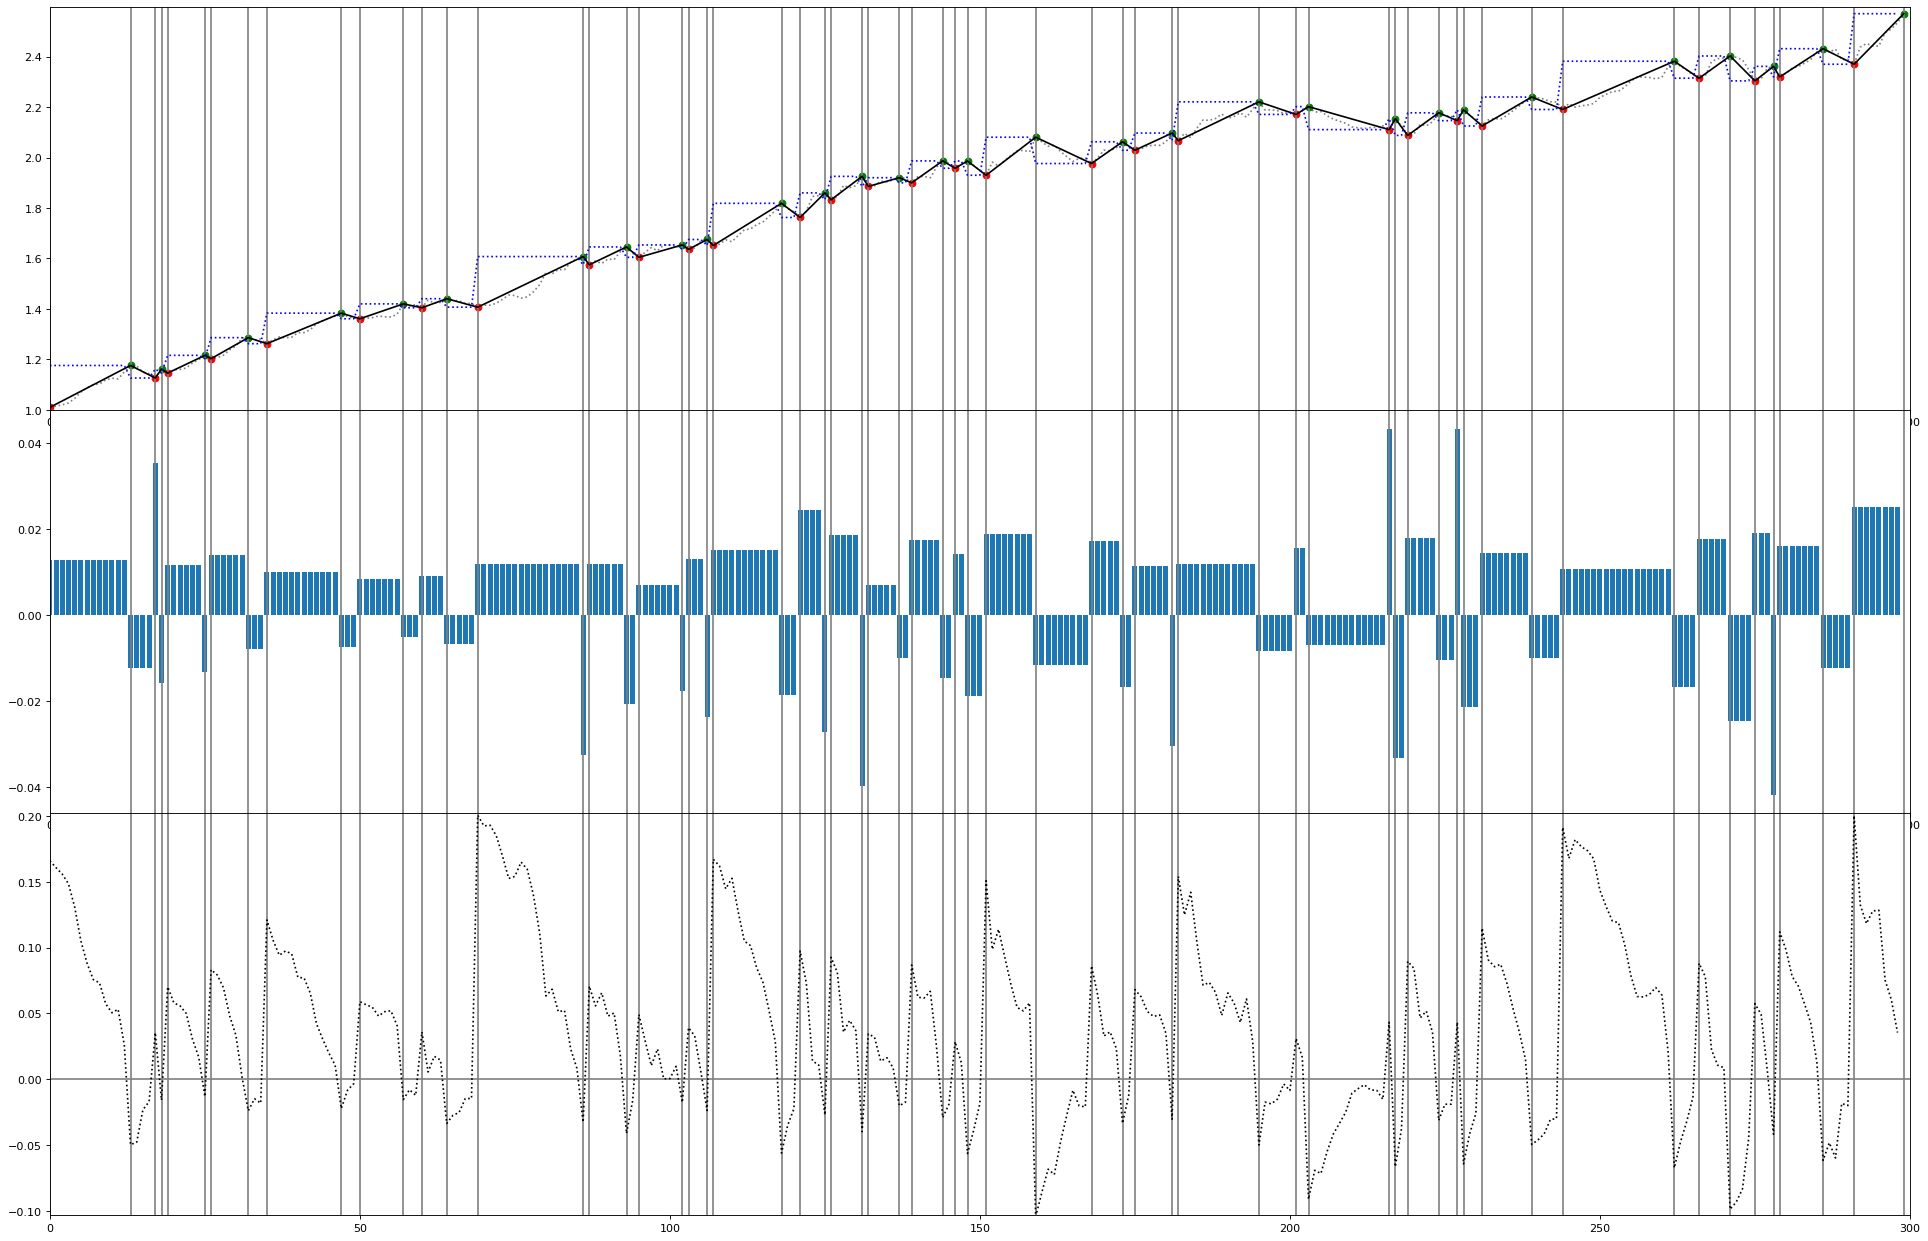

In [9]:
f, axs = plt.subplots(3,1,figsize=(30,20), dpi=80)
plt.subplots_adjust(hspace=0)

axs[0].set_xlim(0, len(X))
axs[0].set_ylim(x_sr.min()*0.99, x_sr.max()*1.01)
axs[0].plot(np.arange(len(x_sr)), x_sr, 'k:', alpha=0.5)
axs[0].plot(np.arange(len(X)), zzb_df[zzc.VALUE_COL_NAME], 'k-')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == 1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == 1], color='g')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == -1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == -1], color='r')
axs[0].plot(np.arange(len(X)), zzb_df[zzc.NEAREST_EXT_COL_NAME], 'b:')

axs[1].set_xlim(0, len(X))
axs[1].set_ylim(zzb_df[zzc.ANGLE_COL_NAME].min()*1.10, zzb_df[zzc.ANGLE_COL_NAME].max()*1.10)
axs[1].bar(np.arange(len(X)), zzb_df[zzc.ANGLE_COL_NAME])

axs[2].set_xlim(0, len(X))
axs[2].set_ylim(zzb_df[zzc.DELTA_NEAR_EXT_COL_NAME].min()*0.99, zzb_df[zzc.DELTA_NEAR_EXT_COL_NAME].max()*1.01)
axs[2].plot(np.arange(len(X)), zzb_df[zzc.DELTA_NEAR_EXT_COL_NAME], 'k:')
axs[2].hlines(0,xmin=0,xmax=len(X), colors='grey')

for i in range(len(axs)):   
    axs[i].vlines(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] != 0],*axs[i].get_ylim(),"grey")

In [10]:
from src.ZigZag.Vizualize import draw_chart

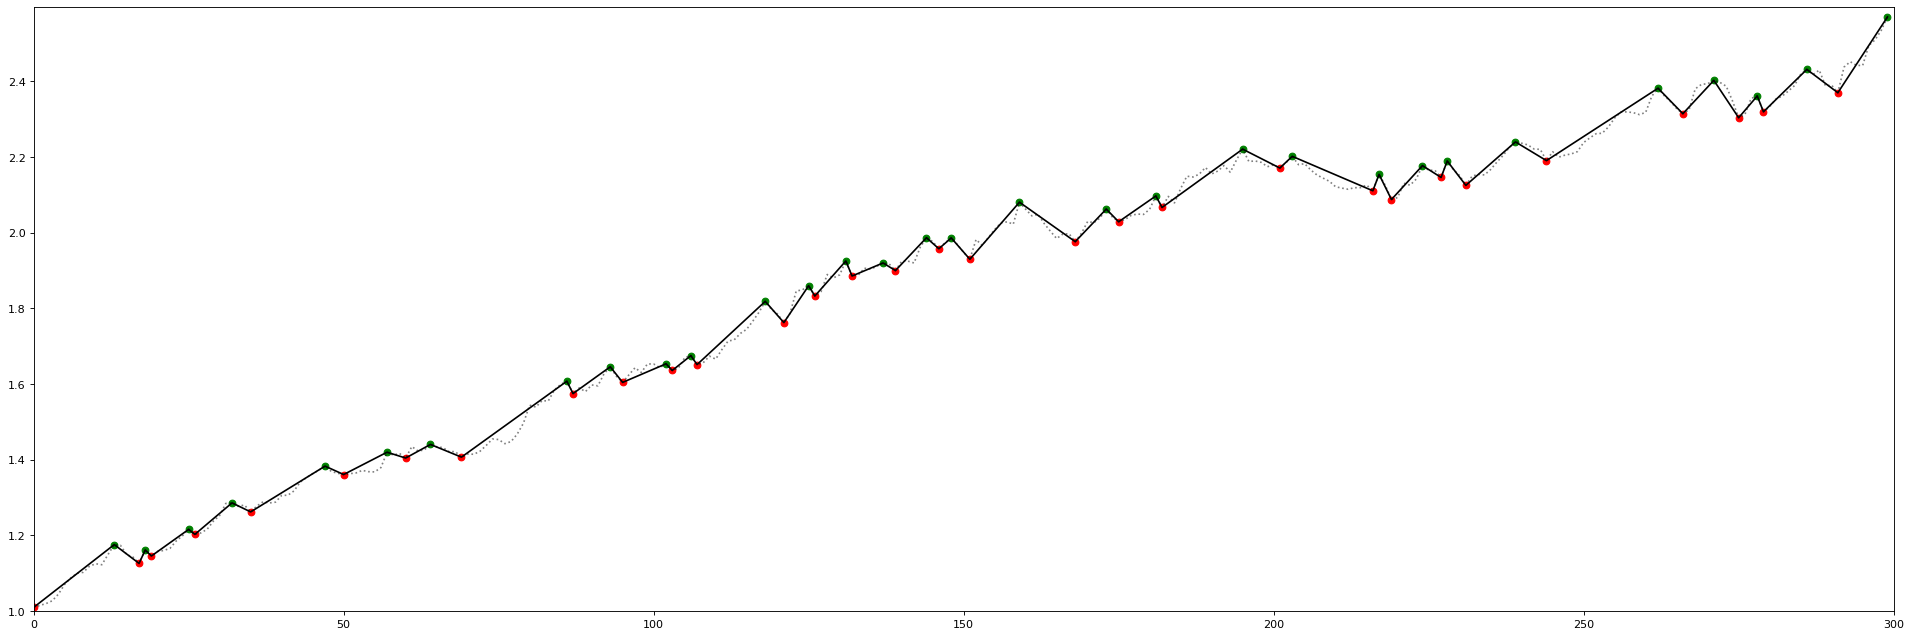

In [11]:
draw_chart(x_sr, zzb_df)

# ProfitCalculator

In [12]:
moves = zzb_df[zzb_df[FLAG_COL_NAME]!=0][[VALUE_COL_NAME,DELTA_NEAR_EXT_COL_NAME]].abs()
moves.head()

,Value,Delta_Near_Ext
2000-01-01,1.009469,0.165997
2000-01-19,1.175465,0.049659
2000-01-25,1.125806,0.035445
2000-01-26,1.161251,0.015848
2000-01-27,1.145403,0.070247


In [13]:
perc_moves = moves[DELTA_NEAR_EXT_COL_NAME]/moves[VALUE_COL_NAME]
perc_moves.head()

2000-01-01    0.164440
2000-01-19    0.042246
2000-01-25    0.031484
2000-01-26    0.013647
2000-01-27    0.061330
dtype: float64

In [14]:
print(f"sum {perc_moves.sum()}")
print(f"mult {(perc_moves+1).product()}")

sum 2.363642067676229
mult 9.908489813954864


# ParameterConfigurator

In [15]:
from src.ZigZag.Configurator.ParameterConfigurator import Search_by_range,check_no_same_move_direction,Check_len_size,Check_machine

In [16]:
len_checker = Check_len_size(10)
chk_machine = Check_machine([check_no_same_move_direction, len_checker.check])

In [17]:
search_res = Search_by_range(x_sr,np.arange(-0.2, 0.2, 0.01),np.arange(-0.2, 0, 0.01),check_func=check_no_same_move_direction)
search_res

(0.010000000000000175, -0.009999999999999842)

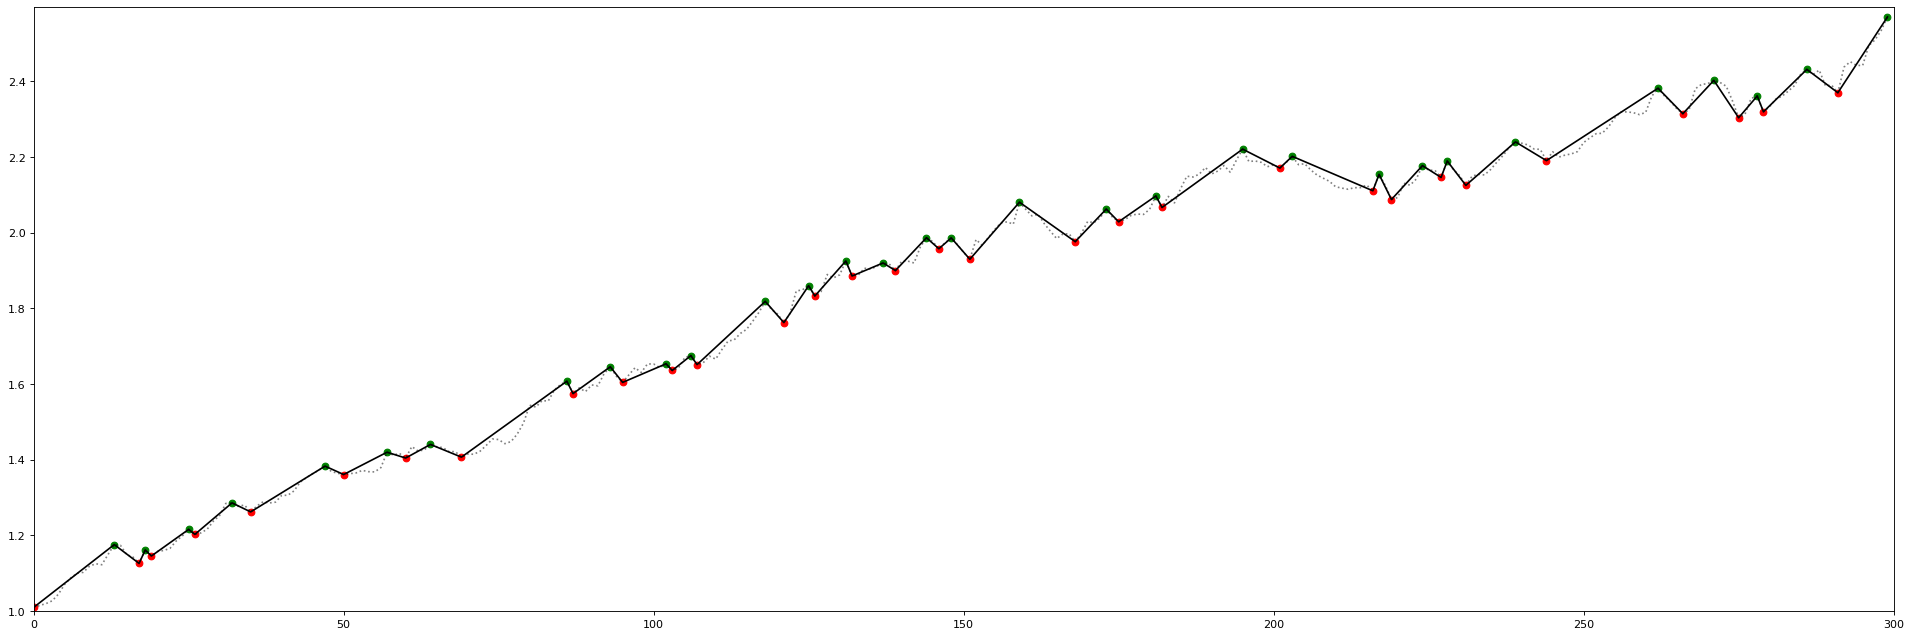

In [18]:
opt_zz2 = ZigZagBuilder(*search_res).build_all(x_sr)
draw_chart(x_sr,opt_zz2)

In [19]:
np.random.seed(1997)
        
start_date = date(2000,1,1)
x_dt_idx = []
for i in range(10):
    x_dt_idx.append(start_date)
    start_date = start_date+timedelta(days=1)
    while start_date.weekday() >= 5:
        start_date = start_date+timedelta(days=1)

x_sr = pd.Series(np.cumprod(1 + np.random.randn(10) * 0.01), index=x_dt_idx)
zz_f = ZigZagBuilder(0.01, -0.0001)

asserted_sr = zz_f.build_all(x_sr)
asserted_sr

,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext,Next_Index,Rows_to_Nearest_Ext
2000-01-01,-1,1.004446,0.000247,1.004694,0.000247,2000-01-03,1.0
2000-01-03,1,1.004694,-0.000163,1.004531,-0.000163,2000-01-04,1.0
2000-01-04,-1,1.004531,0.010581,1.064934,0.060403,2000-01-11,5.0
2000-01-05,0,1.015112,0.010581,1.064934,0.058103,2000-01-11,4.0
2000-01-06,0,1.025693,0.010581,1.064934,0.045754,2000-01-11,3.0
2000-01-07,0,1.036273,0.010581,1.064934,0.025752,2000-01-11,2.0
2000-01-10,0,1.046854,0.010581,1.064934,0.014282,2000-01-11,1.0
2000-01-11,1,1.057435,0.003749,1.064934,0.007499,2000-01-13,2.0
2000-01-12,0,1.061185,0.003749,1.064934,0.010242,2000-01-13,1.0
2000-01-13,1,1.064934,NaN,NaN,NaN,NaN,NaN


In [20]:
tmp_df = zzb_df.reset_index()
tmp_df[tmp_df["Flag"]!=0]
tmp_df

,index,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext,Next_Index,Rows_to_Nearest_Ext
0,2000-01-01,-1,1.009469,0.012769,1.175465,0.165997,2000-01-19,13.0
1,2000-01-03,0,1.022238,0.012769,1.175465,0.160725,2000-01-19,12.0
2,2000-01-04,0,1.035007,0.012769,1.175465,0.155866,2000-01-19,11.0
3,2000-01-05,0,1.047776,0.012769,1.175465,0.148498,2000-01-19,10.0
4,2000-01-06,0,1.060545,0.012769,1.175465,0.130805,2000-01-19,9.0
...,...,...,...,...,...,...,...,...
295,2001-02-16,0,2.470060,0.025042,2.570228,0.128395,2001-02-22,4.0
296,2001-02-19,0,2.495102,0.025042,2.570228,0.075296,2001-02-22,3.0
297,2001-02-20,0,2.520144,0.025042,2.570228,0.060623,2001-02-22,2.0
298,2001-02-21,0,2.545186,0.025042,2.570228,0.035517,2001-02-22,1.0
